In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataSet = pd.read_csv("S02-hw-dataset.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataSet.head(5) # первые 5 строк датасета

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [ ]:
dataSet.info() # вывод информации о стообцах и типах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [ ]:
dataSet.describe() # описание статистики

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [ ]:
dataSet.isna().mean() # доля пустых значений в столбцах

,0
user_id,0.00000
age,0.04878
country,0.00000
purchases,0.00000
revenue,0.00000


In [ ]:
dataSet.duplicated() # вывод дупликатов

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [8]:
dataSet.loc[dataSet['age'] > 100, 'user_id'] # вывод индекс и id пользователя, где возраст больше 100


,user_id
5,6


In [9]:
dataSet.loc[dataSet['purchases'] < 0, 'user_id'] # вывод индекс и id пользователя, где продаж меньше 0


,user_id
5,6


In [10]:
condition = (dataSet['purchases'] != 0) & (dataSet['revenue'] == 0)
dataSet.loc[condition, 'user_id'] # вывод индекс и id пользователя, где доход нулевой при не нулевых продажах


,user_id
10,11


В данных были обнаружены дублирующиеся данные (они могут ввести в заблуждение при обучении ии). Также были найдены строки с плохими данными. Например:

*   нереалистичными данными (слишком большой возраст), (отсутвие доходов при не 0х продажах)
*   Отстсвующие данные в строках



In [12]:
dataSet['purchases'].value_counts() # количество пользователей с разным количеством продаж


,count
purchases,
7,8
6,8
3,5
5,4
4,4
2,3
0,3
9,2
-1,1


In [13]:
dataSet.groupby('country')['purchases'].sum() # количество продаж из каждой страны


,purchases
country,
CN,9
DE,39
FR,51
RU,62
US,37


На данных видно что мало кто сделал больше 7 продаж. А страны с самым большим кол-вом продаж являются FR и RU;

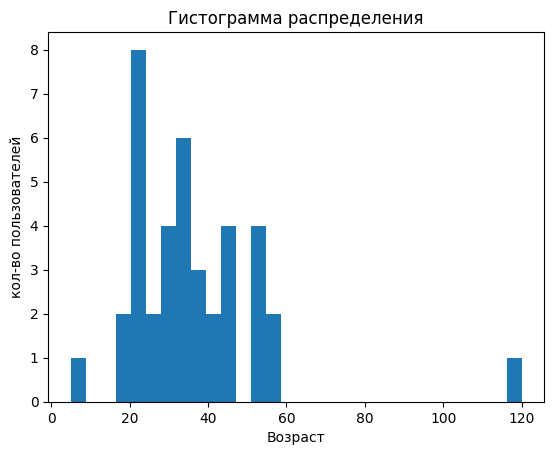

In [16]:
plt.hist(dataSet['age'], bins=30)
plt.xlabel('Возраст')
plt.ylabel('кол-во пользователей')
plt.title('Гистограмма распределения')
# plt.savefig('figures/Distribution histogram')
plt.show()


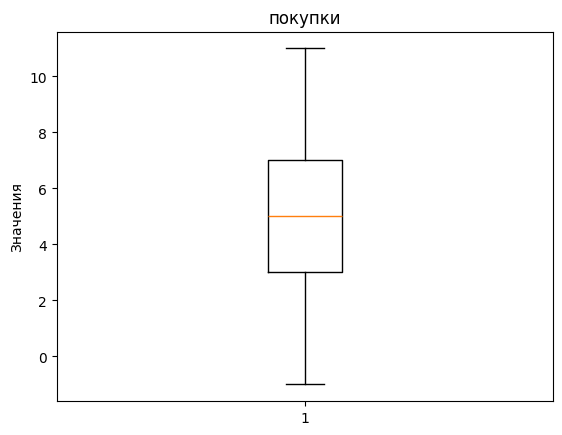

In [37]:
plt.boxplot(dataSet['purchases'])
plt.ylabel('Значения')
plt.title("покупки")
plt.savefig('figures/boxplot')
plt.show()

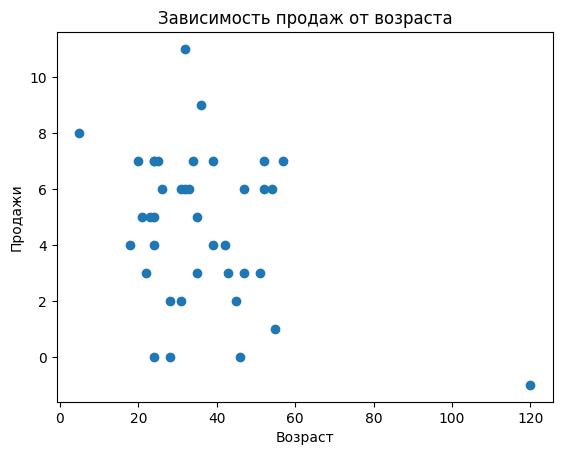

In [36]:
plt.scatter(dataSet['age'], dataSet['purchases'])
plt.xlabel('Возраст')
plt.ylabel('Продажи')
plt.title('Зависимость продаж от возраста')
plt.savefig('saves/scatter')
plt.show()